In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [20]:
# Choose one file to demonstrate all steps
folder = "data/ZyxAct_16kPa_small/cell_1"
file = "Disp_Trac_CellMask_ForceMask_Actin_27.npy"  # Replace with an existing file
path = os.path.join(folder, file)

In [21]:
# Load the data
data = np.load(path, allow_pickle=True)
ux, uy = data[0], data[1]
fx, fy = data[2], data[3]
mask = data[4]
protein = data[6]

In [22]:
# Load and unpack
data = np.load(path)
ux, uy = data[0], data[1]
fx, fy = data[2], data[3]
mask = data[4]
protein = data[6]

# Basic info
print("Shape:", data.shape)
print("Type:", type(data))

# Display min/max for each channel
channels = ["ux", "uy", "fx", "fy", "mask", "?", "protein"]
for i, name in enumerate(channels):
    print(f"{name:<8}: min={data[i].min():.3f}, max={data[i].max():.3f}, mean={data[i].mean():.3f}")

Shape: (8, 992, 992)
Type: <class 'numpy.ndarray'>
ux      : min=-5.135, max=3.393, mean=-0.040
uy      : min=-3.826, max=3.580, mean=0.003
fx      : min=-2623.118, max=3009.549, mean=0.000
fy      : min=-3105.065, max=2089.360, mean=0.000
mask    : min=0.000, max=255.000, mean=28.954
?       : min=0.000, max=255.000, mean=83.810
protein : min=0.000, max=813.000, mean=7.538


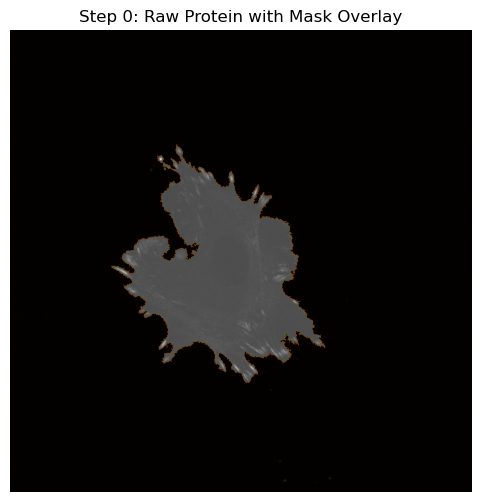

In [23]:
# Step 0: Raw protein with mask overlay
plt.figure(figsize=(6, 6))
plt.imshow(protein, cmap='gray')
plt.imshow(mask, cmap='hot', alpha=0.3)
plt.title("Step 0: Raw Protein with Mask Overlay")
plt.axis('off')
plt.show()

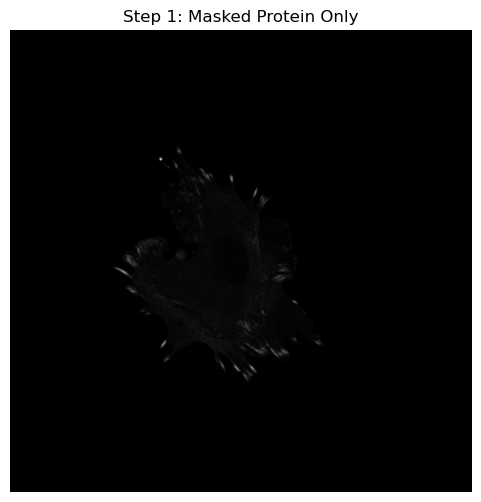

In [24]:
# Step 1: Masked protein only
masked_protein = np.where(mask > 0, protein, 0)
plt.figure(figsize=(6, 6))
plt.imshow(masked_protein, cmap='gray')
plt.title("Step 1: Masked Protein Only")
plt.axis('off')
plt.show()

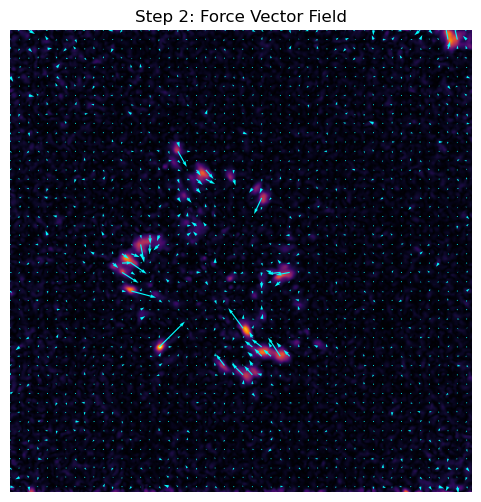

In [32]:
# Step 2: Force vector field (unmasked)
mag = np.sqrt(fx**2 + fy**2)
plt.figure(figsize=(6, 6))
plt.imshow(mag, cmap='inferno')
X, Y = np.meshgrid(np.arange(0, fx.shape[1], 20), np.arange(0, fx.shape[0], 20))
plt.quiver(
    X, Y, fx[::20, ::20], fy[::20, ::20],
    color='cyan',
    scale=50,              # Higher = shorter arrows
    scale_units='xy',
    angles='xy',
    width=0.0025
)
plt.title("Step 2: Force Vector Field")
plt.axis('off')
plt.show()

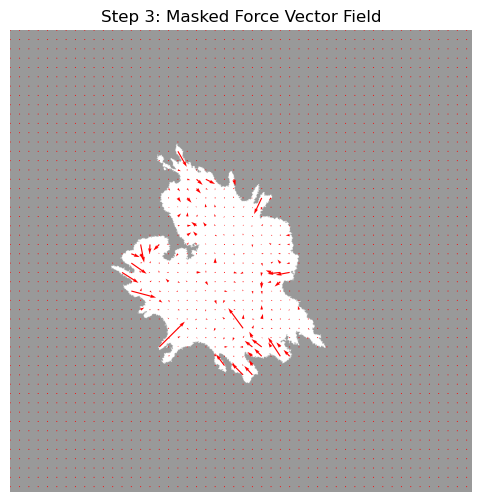

In [29]:
# Step 3: Masked force vector field
masked_fx = np.where(mask > 0, fx, 0)
masked_fy = np.where(mask > 0, fy, 0)
plt.figure(figsize=(6, 6))
plt.imshow(mask, cmap='gray', alpha=0.4)
X, Y = np.meshgrid(np.arange(0, fx.shape[1], 20), np.arange(0, fx.shape[0], 20))
plt.quiver(
    X, Y, masked_fx[::20, ::20], masked_fy[::20, ::20],
    color='red',
    scale=500,
    scale_units='xy',
    angles='xy',
    width=0.0025
)
plt.title("Step 3: Masked Force Vector Field")
plt.axis('off')
plt.show()